 !!!!Classification binaire des avis du dataset IMDB!!!!

Prétraitement des Données

In [ ]:
# Chargement du dataset
from keras.datasets import imdb

# On charge uniquement les 10 000 mots les plus fréquents
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Transformation des séquences en matrices binaires

In [ ]:
# Chaque avis doit être converti en vecteur binaire (one-hot encoding) pour pouvoir être traité par un réseau de neurones dense.
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Créer une matrice de zéros de taille (nombre d'exemples, dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  # Mettre à 1 les indices correspondants aux mots présents
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)


Division du dataset

In [ ]:
# Pour bien suivre l’évolution du modèle, il est recommandé de séparer une partie des données d’entraînement pour la validation. Par exemple, on peut utiliser les 10 000 premiers exemples pour la validation et le reste pour l’entraînement.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


 2 : onstruction du Modèle

In [ ]:
# Construction d'un réseau de neurones à propagation avant avec deux couches cachées (activation ReLU) et une couche de sortie avec activation sigmoïde pour la classification binaire.
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilation du modèle

In [ ]:
# Utilise l’optimiseur RMSprop, la perte « binary_crossentropy » (adaptée à la classification binaire) et l’accuracy comme métrique d’évaluation.
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Entraînement du Modèle

In [ ]:
# Entraîne le modèle sur l’ensemble d’entraînement (après séparation validation) pendant 20 epochs avec une taille de batch de 512. La validation permet de suivre la performance sur des données non vues pendant l’entraînement.
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.6973 - loss: 0.5995 - val_accuracy: 0.8672 - val_loss: 0.4142
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9002 - loss: 0.3547 - val_accuracy: 0.8860 - val_loss: 0.3240
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9184 - loss: 0.2632 - val_accuracy: 0.8838 - val_loss: 0.2975
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9377 - loss: 0.2064 - val_accuracy: 0.8889 - val_loss: 0.2815
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9472 - loss: 0.1698 - val_accuracy: 0.8761 - val_loss: 0.3053
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9578 - loss: 0.1429 - val_accuracy: 0.8868 - val_loss: 0.2811
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9632 - loss: 0.1231 - val_accuracy: 0.8859 - val_loss: 0.2876
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9719 - loss: 0.1077 - val_accuracy: 0.8806 - 

4. Évaluation et Visualisation

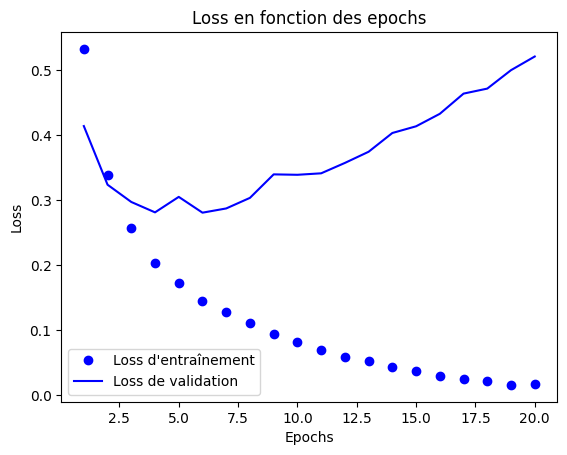

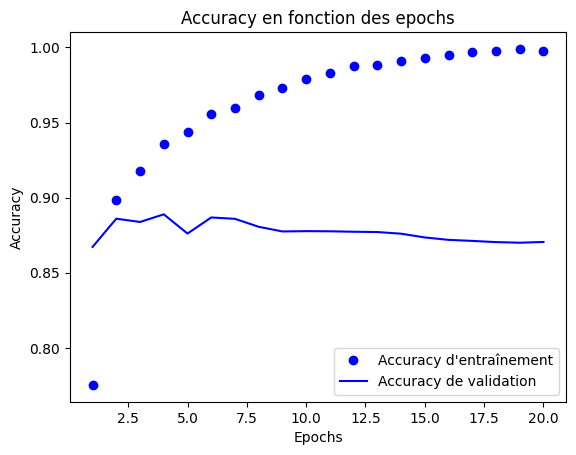

In [ ]:
# Pour détecter un éventuel surapprentissage (overfitting), trace les courbes de loss et d’accuracy pour l’entraînement et la validation.
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# Courbe de la loss
plt.figure()
plt.plot(epochs, loss_values, 'bo', label="Loss d'entraînement")
plt.plot(epochs, val_loss_values, 'b', label="Loss de validation")
plt.title('Loss en fonction des epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Courbe de l'accuracy
plt.figure()
plt.plot(epochs, acc_values, 'bo', label="Accuracy d'entraînement")
plt.plot(epochs, val_acc_values, 'b', label="Accuracy de validation")
plt.title('Accuracy en fonction des epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Réentrainement et réévaluation sur l'ensemble des Tests

In [ ]:
# Supposons que 9 epochs soient optimaux
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.7015 - loss: 0.6153 - val_accuracy: 0.8594 - val_loss: 0.4221
Epoch 2/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8886 - loss: 0.3684 - val_accuracy: 0.8832 - val_loss: 0.3254
Epoch 3/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9162 - loss: 0.2665 - val_accuracy: 0.8884 - val_loss: 0.2900
Epoch 4/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9310 - loss: 0.2119 - val_accuracy: 0.8896 - val_loss: 0.2791
Epoch 5/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9410 - loss: 0.1782 - val_accuracy: 0.8841 - val_loss: 0.2827
Epoch 6/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9515 - loss: 0.1537 - val_accuracy: 0.8755 - val_loss: 0.3114
Epoch 7/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9563 - loss: 0.1319 - val_accuracy: 0.8829 - val_loss: 0.2898
Epoch 8/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9703 - loss: 0.1071 - val_accuracy: 0.8823 - val_loss:

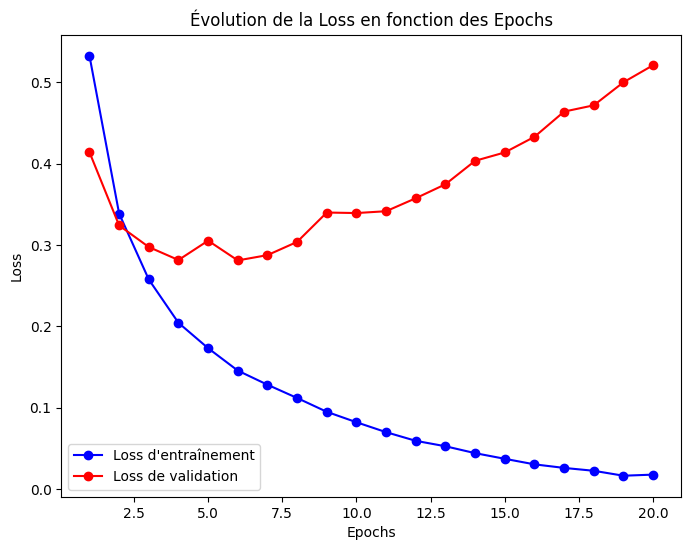

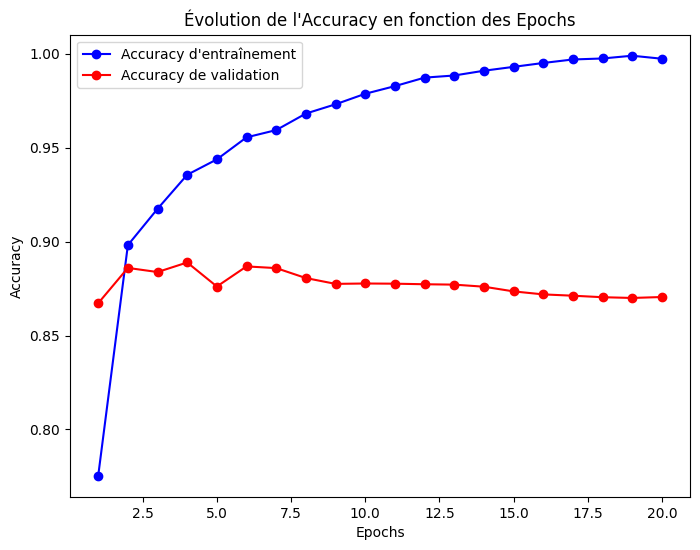

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8710 - loss: 0.3447
Résultats sur l'ensemble test : Loss = 0.3392, Accuracy = 0.8734


In [ ]:
import matplotlib.pyplot as plt


# L'historique contient des listes pour 'loss', 'val_loss', 'accuracy' et 'val_accuracy'
history_dict = history.history

# Récupération des métriques
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

# 1. Comparaison des courbes de loss

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, 'bo-', label="Loss d'entraînement")
plt.plot(epochs, val_loss, 'ro-', label="Loss de validation")
plt.title("Évolution de la Loss en fonction des Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 2. Comparaison des courbes d'accuracy

plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, 'bo-', label="Accuracy d'entraînement")
plt.plot(epochs, val_accuracy, 'ro-', label="Accuracy de validation")
plt.title("Évolution de l'Accuracy en fonction des Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 3. Évaluation finale sur l'ensemble test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Résultats sur l'ensemble test : Loss = {test_loss:.4f}, Accuracy = {test_accuracy:.4f}")

# Interprétations et conclusions (à rédiger dans votre rapport) :
# - Si la courbe de la loss de validation commence à augmenter après quelques epochs,
#   cela indique un surapprentissage (overfitting).
# - De même, une divergence entre l'accuracy d'entraînement et celle de validation peut être un signal d'overfitting.
# - La performance finale sur l'ensemble test (test_loss et test_accuracy) permet d'évaluer comment le modèle se comporte sur des données non vues.
